In [37]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
from sklearn import datasets

In [38]:
# Load a dummy dataset
mpg = sns.load_dataset('mpg')

# Set years as datetime
mpg['model_year'] = pd.to_datetime(mpg['model_year'].apply(lambda x: f'19{x}'))

# Car company 
mpg['company'] = mpg['name'].apply(lambda x: x.split(' ')[0])

In [39]:
# Configure matplotlib style
sns.set()

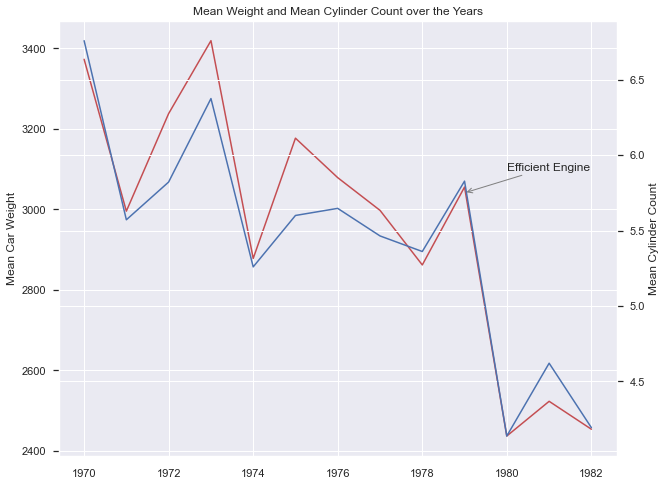

In [40]:
# Build a Twin axis dual plot
fig, ax = plt.subplots(figsize=(10, 8))

# Mean car weight by year
year_trends = mpg.groupby('model_year')[['weight', 'cylinders']].mean()

# Plot year vs mean weight and config axes
ax.plot(year_trends.index, year_trends['weight'], color='r', label='Mean Car Weight')
ax.set(ylabel='Mean Car Weight', title='Mean Weight and Mean Cylinder Count over the Years')

# Get a copy of x axis for a double y-axis plot
ax2 = ax.twinx()

# Plot year vs mean cylinder count and config axes
ax2.plot(year_trends.index, year_trends['cylinders'], color='b', label='Mean cylinder count')
ax2.set(ylabel='Mean Cylinder Count')

# Annotate plot
ax2.annotate(
    "Efficient Engine",
    xy=(pd.Timestamp('1979'), 5.75),
    xytext=(pd.Timestamp('1980'), 5.9),
    arrowprops={'arrowstyle': '->', 'color': 'grey'})

# Display plot
plt.show()

In [41]:
# New dataset for bar plotting (Medals)
olympics = pd.read_csv('datasets/olympics_toy.csv')

# Sample dataset
olympics.sample(5)

,Country,Bronze,Gold,Silver
7,Italy,24,8,38
0,United States,67,137,52
1,Germany,67,47,43
4,China,35,44,30
8,Canada,61,4,4


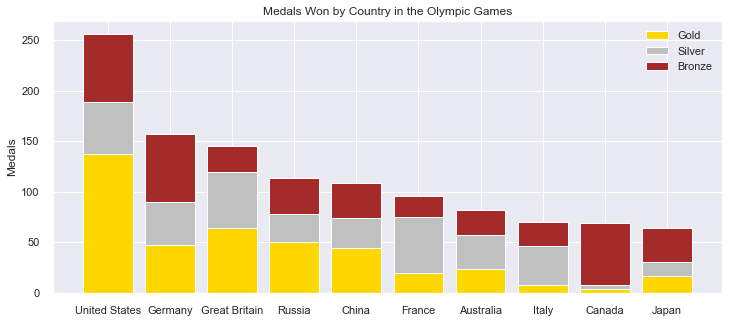

In [59]:
# Build figure
fig, ax = plt.subplots(figsize=(12, 5))

# Add data to axis
ax.bar(olympics['Country'], olympics['Gold'], label='Gold', color='gold')
ax.bar(olympics['Country'], olympics['Silver'], label='Silver', bottom=olympics['Gold'], color='silver')
ax.bar(olympics['Country'], olympics['Bronze'], label='Bronze', bottom=olympics['Gold'] + olympics['Silver'], color='brown')

# Set configuration
ax.set(title='Medals Won by Country in the Olympic Games', ylabel='Medals')

# Display legend and figure
plt.legend()
plt.show()